<a href="https://www.kaggle.com/code/alexredna/aeroclub-challenge?scriptVersionId=131009274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Constants and imports

In [1]:
DEPTH = 5
ITER = 150

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as m

pd.options.display.max_columns = None
pd.options.display.max_rows = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data vis

In [3]:
agent_tuned = pd.read_csv('/kaggle/input/aeroclub/request_agent_tunned.csv')
client_tuned = pd.read_csv('/kaggle/input/aeroclub/request_client_tunned.csv')
display(agent_tuned.head())
client_tuned.head()

/tmp/ipykernel_20/3306113334.py:2: DtypeWarning: Columns (3,43) have mixed types. Specify dtype option on import or set low_memory=False.
  client_tuned = pd.read_csv('/kaggle/input/aeroclub/request_client_tunned.csv')


,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,RequestDepartureDate,RequestReturnDate,DepartureDate,ArrivalDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5,FlightDate_1,FlightDate_2,FlightDate_3,FlightDate_4,FlightDate_5
0,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 07:40:00.000,2022-06-14 08:50:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,14356,2,0,1,1,0,1,0,266,164,116,132,154,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
1,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,23712,2,1,1,1,0,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
2,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,21485,2,1,1,1,1,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
3,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,18212,2,1,1,2,0,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
4,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,17360,2,1,1,1,1,1,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN


,RequestID,RequestDate,ClientID,ClientGrade,RequestDepartureDate,RequestReturnDate,DepartureDate,ArrivaDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5,FlightDate_1,FlightDate_2,FlightDate_3,FlightDate_4,FlightDate_5
0,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,3925,1,0,2,2,1,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
1,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,4351,1,0,2,2,0,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
2,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,5925,1,1,2,2,1,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
3,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,6351,1,1,2,2,0,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
4,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,9900,1,1,2,2,1,0,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN


In [4]:
agent_tuned = agent_tuned.select_dtypes(include='int64')
client_tuned = client_tuned.select_dtypes(include='int64')
agent_tuned = agent_tuned[[n for n in agent_tuned.columns if n not in ['RequestID', 'EmployeeId', 'ClientID']]]
client_tuned = client_tuned[[n for n in client_tuned.columns if n not in ['RequestID', 'EmployeeId', 'ClientID']]]
display(agent_tuned.sample(5))
client_tuned.sample(5)

,TravellerGrade,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
431785,0,2,28442,2,1,1,1,0,1,0,154,298,235,157,5648,5509,5904,3006,1105,153,303,270,302,286,301,218,180,121,104
576619,0,1,8999,2,1,2,2,1,1,0,176,156,235,157,5828,7794,5904,3006,1105,252,181,317,344,286,301,218,180,121,104
102965,0,5,119959,2,1,1,1,0,0,0,176,231,158,83,1766,1425,1006,233,44,68,90,85,186,277,45,42,55,40,30
458705,0,5,268788,2,1,1,1,0,1,0,2,190,132,2,6874,6166,5273,2472,820,2,148,140,321,266,81,69,82,58,1
333312,0,6,267918,2,1,1,1,0,1,0,154,120,92,72,2075,1742,736,279,122,153,81,301,91,82,117,96,55,40,97


,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
624968,2,45298,1,1,2,2,0,0,3,0,1,0,0,5,488,182,424,270,146,0,2,2,7,39,49,46,29,26,24
272358,2,29635,1,1,0,1,1,1,1,0,1,0,0,5,488,545,424,270,146,0,2,2,7,39,49,46,29,26,24
577780,2,19088,1,1,2,2,1,1,1,0,1,8,8,5,331,355,424,270,146,2,33,33,33,39,49,46,29,26,24
823671,2,21743,1,1,0,1,1,1,3,0,1,9,9,5,280,332,424,270,146,2,34,34,33,39,49,46,29,26,24
387371,2,7535,1,0,2,2,1,0,3,0,1,9,9,5,158,154,424,270,146,0,34,34,7,39,49,46,29,26,24


In [5]:
display(agent_tuned.describe(include='all')) 
client_tuned.describe(include='all')

,TravellerGrade,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
count,637402.000000,637402.000000,6.374020e+05,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000,637402.000000
mean,0.527637,3.057913,1.288155e+05,1.576942,0.913227,1.303152,1.491803,0.219984,0.839133,0.039234,165.169091,162.020805,159.899421,111.117850,4974.885018,4933.938463,4540.742492,2399.200174,1006.137563,182.191796,146.641289,156.519465,201.545471,205.849433,213.741465,169.634435,145.438439,107.204268,94.697409
std,2.148246,1.541419,1.877103e+05,0.816423,0.281530,0.732239,0.510851,0.414236,0.367409,0.194152,63.055647,90.828487,79.015936,42.911151,2096.656863,2213.749728,1792.541898,929.768732,252.227154,96.377391,98.221730,102.861019,110.700341,94.138882,101.096282,67.026567,54.139746,30.395467,24.001694
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.358900e+04,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,154.000000,81.000000,100.000000,83.000000,2530.000000,2893.000000,3777.000000,2236.000000,1105.000000,68.000000,81.000000,85.000000,91.000000,124.000000,123.000000,99.000000,102.000000,121.000000,104.000000
50%,0.000000,3.000000,6.559200e+04,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,176.000000,172.000000,192.000000,83.000000,5395.000000,5249.000000,5330.000000,3006.000000,1105.000000,206.000000,107.000000,140.000000,197.000000,266.000000,274.000000,218.000000,180.000000,121.000000,104.000000
75%,0.000000,4.000000,1.398540e+05,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,176.000000,205.000000,235.000000,157.000000,6816.000000,6580.000000,5904.000000,3006.000000,1105.000000,283.000000,241.000000,270.000000,309.000000,286.000000,301.000000,218.000000,180.000000,121.000000,104.000000
max,21.000000,6.000000,2.944854e+06,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,310.000000,342.000000,235.000000,157.000000,8698.000000,7794.000000,5904.000000,3006.000000,1105.000000,308.000000,364.000000,317.000000,344.000000,286.000000,301.000000,218.000000,180.000000,121.000000,104.000000


,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
count,991993.000000,9.919930e+05,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000,991993.000000
mean,2.094262,2.105158e+04,0.915515,0.616836,1.251916,1.458243,0.534344,0.616833,1.855502,0.004344,1.008608,7.068342,8.770493,5.669395,306.800771,397.553697,395.768569,259.948561,144.586723,1.103831,29.242929,35.168300,24.599543,36.236585,44.963583,44.009561,27.211098,25.833743,23.672125
std,0.821060,2.215360e+04,0.278115,0.486158,0.738481,0.508426,0.498819,0.486159,1.241125,0.065764,0.145579,4.103714,4.797060,1.308705,122.266788,194.266082,80.160274,38.456548,11.516444,1.166144,16.524160,19.967019,13.911982,7.797879,11.236524,7.609432,6.239100,1.491768,2.624890
min,1.000000,8.740000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.838000e+03,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000,8.000000,5.000000,207.000000,212.000000,424.000000,270.000000,146.000000,0.000000,29.000000,33.000000,7.000000,39.000000,49.000000,46.000000,29.000000,26.000000,24.000000
50%,2.000000,1.442100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,8.000000,9.000000,5.000000,311.000000,359.000000,424.000000,270.000000,146.000000,0.000000,33.000000,34.000000,33.000000,39.000000,49.000000,46.000000,29.000000,26.000000,24.000000
75%,2.000000,2.450500e+04,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,9.000000,12.000000,5.000000,396.000000,578.000000,424.000000,270.000000,146.000000,2.000000,34.000000,53.000000,33.000000,39.000000,49.000000,46.000000,29.000000,26.000000,24.000000
max,6.000000,1.600353e+06,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,3.000000,16.000000,15.000000,8.000000,565.000000,703.000000,424.000000,270.000000,146.000000,4.000000,64.000000,65.000000,42.000000,39.000000,49.000000,46.000000,29.000000,26.000000,24.000000


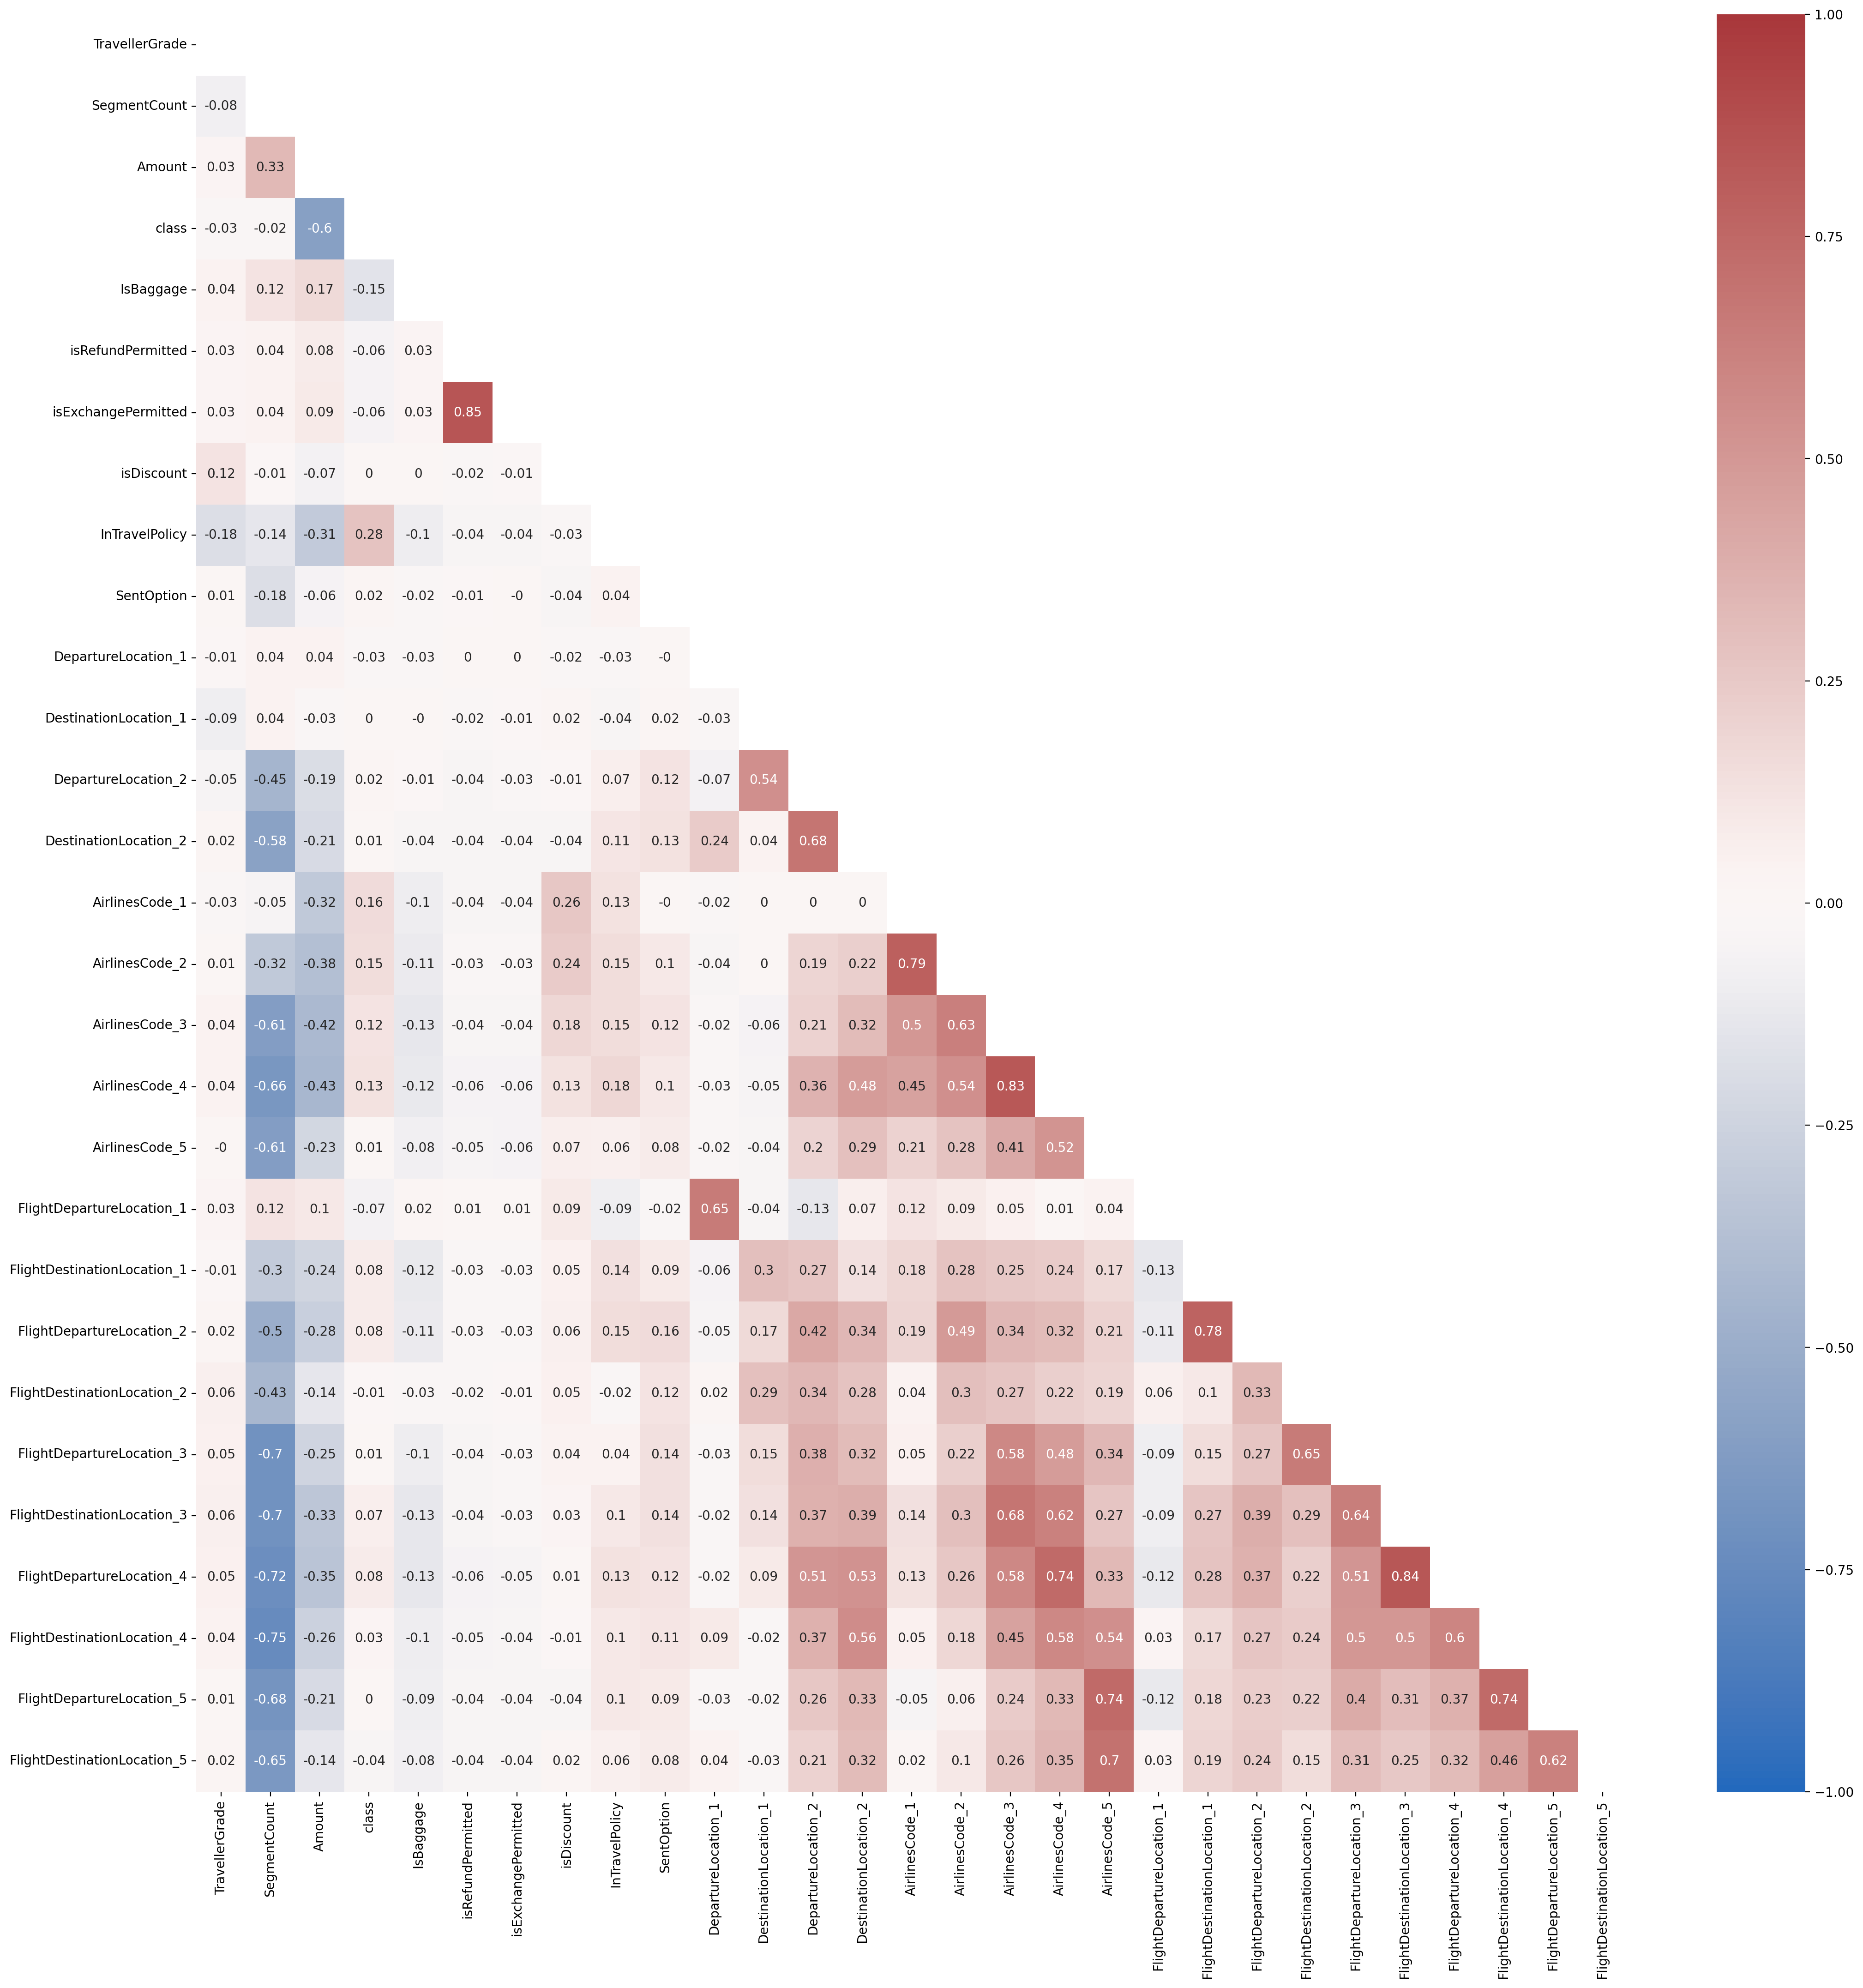

In [6]:
matrix = agent_tuned[agent_tuned.columns].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
figure(figsize=(25, 25), dpi=200)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

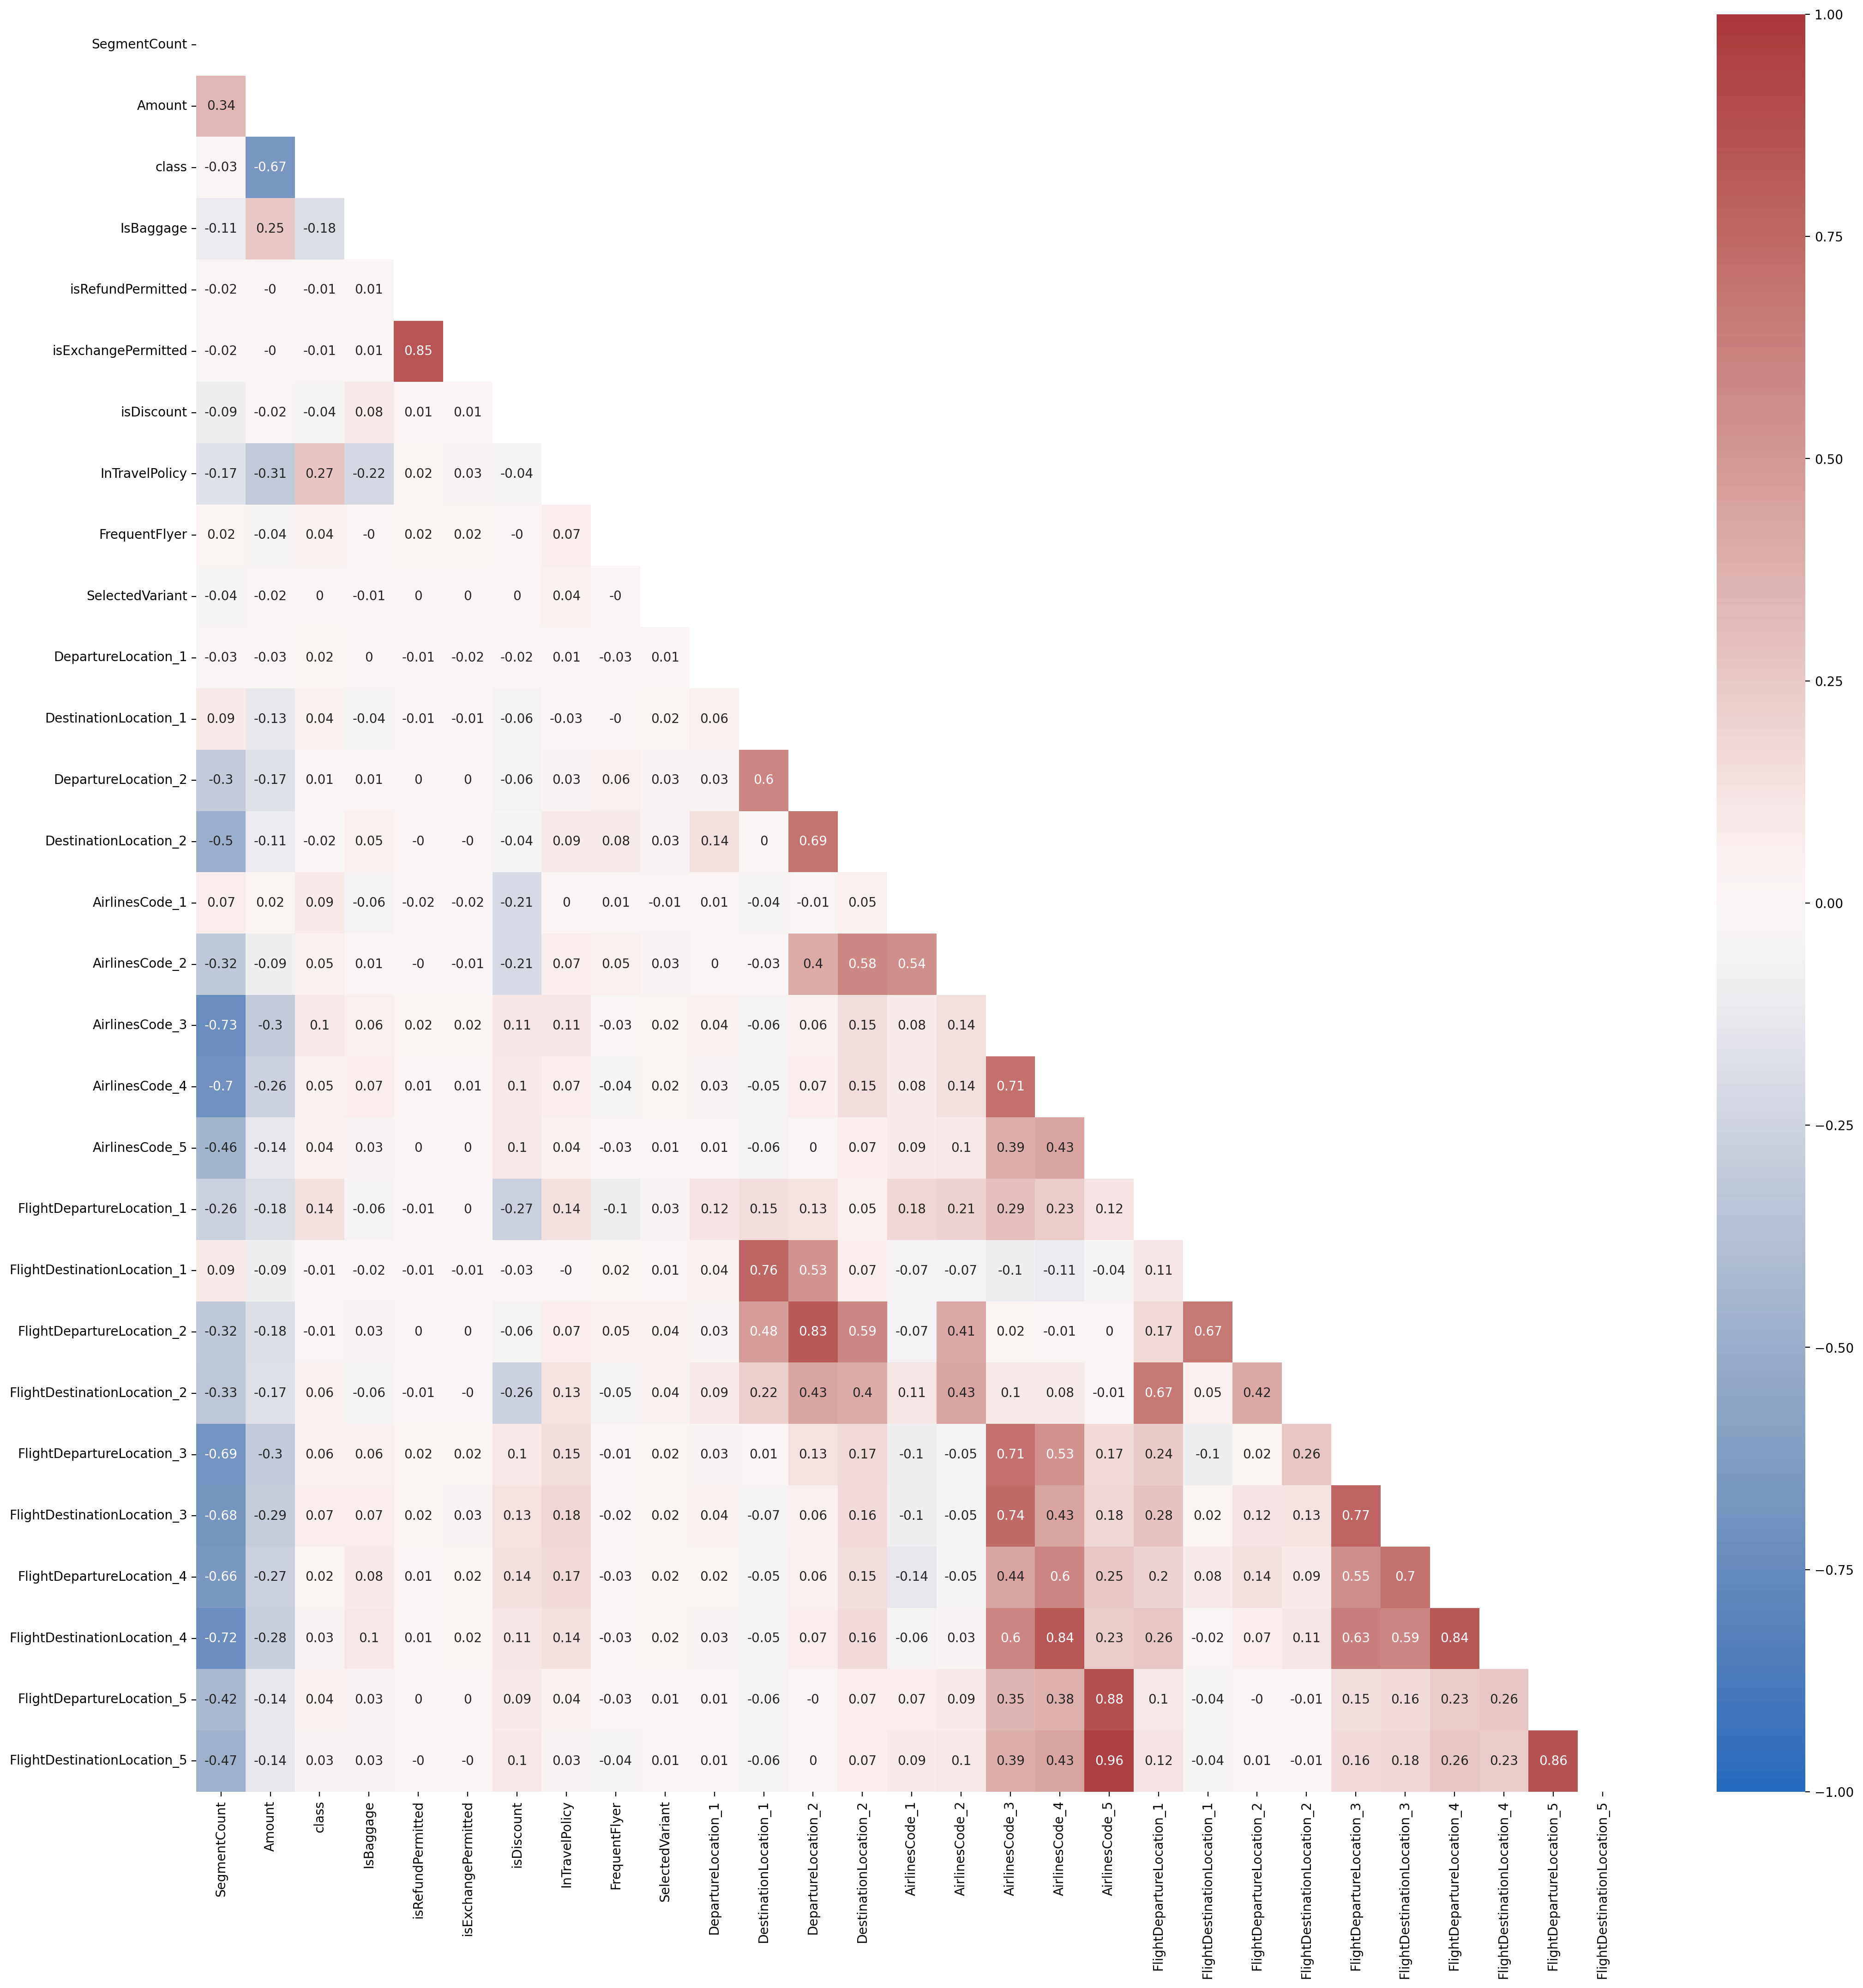

In [7]:
matrix = client_tuned[client_tuned.columns].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
figure(figsize=(25, 25), dpi=200)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [8]:
'''
plt.figure()
sns.pairplot(agent_tuned, kind="kde")
figure(figsize=(25, 25), dpi=200)
plt.show()
'''

'\nplt.figure()\nsns.pairplot(agent_tuned, kind="kde")\nfigure(figsize=(25, 25), dpi=200)\nplt.show()\n'

## Comparing agents and clients dataset

In [9]:
agent_tuned.columns

Index(['TravellerGrade', 'SegmentCount', 'Amount', 'class', 'IsBaggage',
       'isRefundPermitted', 'isExchangePermitted', 'isDiscount',
       'InTravelPolicy', 'SentOption', 'DepartureLocation_1',
       'DestinationLocation_1', 'DepartureLocation_2', 'DestinationLocation_2',
       'AirlinesCode_1', 'AirlinesCode_2', 'AirlinesCode_3', 'AirlinesCode_4',
       'AirlinesCode_5', 'FlightDepartureLocation_1',
       'FlightDestinationLocation_1', 'FlightDepartureLocation_2',
       'FlightDestinationLocation_2', 'FlightDepartureLocation_3',
       'FlightDestinationLocation_3', 'FlightDepartureLocation_4',
       'FlightDestinationLocation_4', 'FlightDepartureLocation_5',
       'FlightDestinationLocation_5'],
      dtype='object')

In [10]:
client_tuned.columns

Index(['SegmentCount', 'Amount', 'class', 'IsBaggage', 'isRefundPermitted',
       'isExchangePermitted', 'isDiscount', 'InTravelPolicy', 'FrequentFlyer',
       'SelectedVariant', 'DepartureLocation_1', 'DestinationLocation_1',
       'DepartureLocation_2', 'DestinationLocation_2', 'AirlinesCode_1',
       'AirlinesCode_2', 'AirlinesCode_3', 'AirlinesCode_4', 'AirlinesCode_5',
       'FlightDepartureLocation_1', 'FlightDestinationLocation_1',
       'FlightDepartureLocation_2', 'FlightDestinationLocation_2',
       'FlightDepartureLocation_3', 'FlightDestinationLocation_3',
       'FlightDepartureLocation_4', 'FlightDestinationLocation_4',
       'FlightDepartureLocation_5', 'FlightDestinationLocation_5'],
      dtype='object')

In [11]:
pd.Series(agent_tuned.columns).compare(pd.Series(client_tuned.columns))

,self,other
0,TravellerGrade,SegmentCount
1,SegmentCount,Amount
2,Amount,class
3,class,IsBaggage
4,IsBaggage,isRefundPermitted
5,isRefundPermitted,isExchangePermitted
6,isExchangePermitted,isDiscount
7,isDiscount,InTravelPolicy
8,InTravelPolicy,FrequentFlyer
9,SentOption,SelectedVariant


## Model training


In [12]:
df_agent_feat = agent_tuned[[n for n in agent_tuned.columns if n not in ['SentOption', 'RequestID', 'EmployeeId', 'ClientID', 'TravellerGrade']]]
df_agent_lab = agent_tuned['SentOption']
display(df_agent_feat.sample())
df_agent_lab.sample()

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
297988,2,133078,0,1,1,1,1,0,176,7,3,83,6648,5255,5904,3006,1105,252,6,6,284,286,301,218,180,121,104


246364    0
Name: SentOption, dtype: int64

In [13]:
df_client_feat = client_tuned[[n for n in client_tuned.columns if n not in ['SelectedVariant', 'RequestID', 'EmployeeId', 'ClientID', 'FrequentFlyer']]]
df_client_lab = client_tuned['SelectedVariant']
display(df_client_feat.sample())
df_client_lab.sample()

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
455755,2,11148,1,1,0,1,1,1,1,8,8,5,334,363,424,270,146,2,33,33,33,39,49,46,29,26,24


42255    0
Name: SelectedVariant, dtype: int64

In [14]:
pd.Series(df_agent_feat.columns).compare(pd.Series(df_client_feat.columns))

,self,other


In [15]:
'''
clf = CatBoostClassifier(logging_level='Silent')

params = {
    'depth': [11, 13, 15], 
    'iterations': [1000, 1500, 2000], 
    'learning_rate': [0.05, 0.1, 0.15]
}

grid_search_result = clf.grid_search(params, X=df_feat, y=df_lab, stratified=True, plot=True)
'''

"\nclf = CatBoostClassifier(logging_level='Silent')\n\nparams = {\n    'depth': [11, 13, 15], \n    'iterations': [1000, 1500, 2000], \n    'learning_rate': [0.05, 0.1, 0.15]\n}\n\ngrid_search_result = clf.grid_search(params, X=df_feat, y=df_lab, stratified=True, plot=True)\n"

In [16]:
clf = CatBoostClassifier(depth=DEPTH, iterations=ITER, logging_level='Silent')
clf.fit(df_agent_feat, df_agent_lab)
clf.fit(df_client_feat, df_client_lab)

In [17]:
print(m.classification_report(df_client_lab, clf.predict(df_client_feat), target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    987684
           1       0.91      0.01      0.01      4309

    accuracy                           1.00    991993
   macro avg       0.95      0.50      0.51    991993
weighted avg       1.00      1.00      0.99    991993

